In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_low_rank_matrix

In [2]:
N_noise = 0.05
Dim_1 = 800
Dim_2 = 100
Intermedia_rank = 10
Block_size = 50
p = 0.01
FIMM_p = 0.005
# S_noise = 0.005

### Generate low-rank matrix $L$

In [3]:
from sklearn.decomposition import NMF
from sklearn.decomposition import non_negative_factorization
L_random = np.random.randn(Dim_1, Dim_2) + 1.0
L_random[np.where((L_random) < 0.0)] = 0.0
L_random = L_random / (2.0 * L_random.max())
W, H, n_iter = non_negative_factorization(L_random, n_components=Intermedia_rank, init='random', random_state=0, max_iter=5000)
L = W@H

[2.91525583e+01 2.89141705e+00 2.87840082e+00 2.81102334e+00
 2.75551040e+00 2.74088146e+00 2.71677198e+00 2.70062358e+00
 2.68225969e+00 2.65920494e+00 5.20600028e-15 2.74961281e-15
 2.74961281e-15 2.74961281e-15 2.74961281e-15 2.74961281e-15
 2.74961281e-15 2.74961281e-15 2.74961281e-15 2.74961281e-15]


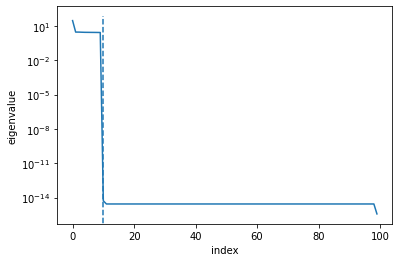

In [4]:
_, s, _ = np.linalg.svd(L, full_matrices=True)
print(s[:20])
plt.semilogy(range(s.shape[0]), s)
plt.xlabel('index')
plt.ylabel('eigenvalue')
plt.vlines(x=Intermedia_rank, ymax=70, ymin=0, linestyles='--')

### Generate noise matrix $N$

In [5]:
N = np.random.randn(*L.shape) * N_noise

### Generate signal $S$

In [6]:
S_local = np.load('./FIMM_data_mar10/FIMM_noise_{}.npy'.format(FIMM_p))
S_high = np.zeros_like(N)
S_high[:S_local.shape[0], :S_local.shape[1]] = S_local

In [7]:
row_permute = np.random.permutation(Dim_1)
row_permute_sort_index = np.argsort(row_permute)
S = S_high[row_permute, :]

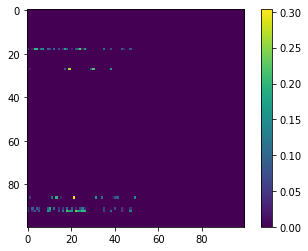

In [8]:
plt.imshow(S[:100, :100], interpolation='nearest')
plt.colorbar()

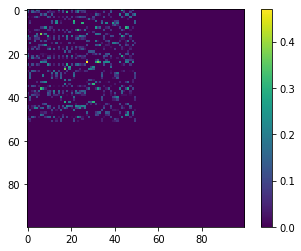

In [9]:
plt.imshow((S[row_permute_sort_index, :])[:100, :100], interpolation='nearest')
plt.colorbar()

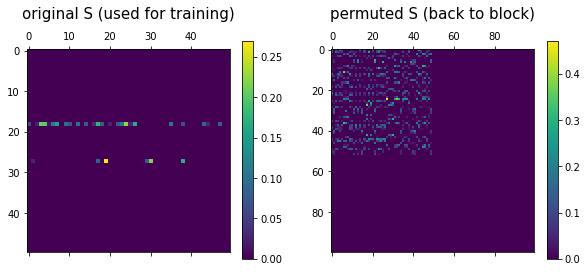

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4))
ax1, ax2 = axes
# max_value = np.maximum(v.max(), M_diff[:, :2].max())
im1 = ax1.matshow(S[:50, :50])
ax1.set_title('original S (used for training)'.format(5), fontsize=15, pad=30)

im2 = ax2.matshow(S[row_permute_sort_index, :][:100, :100])
ax2.set_title('permuted S (back to block)'.format(10), fontsize=15, pad=30)

fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)    

### Generate synthetic matrix $M$

In [11]:
M = N + L + S

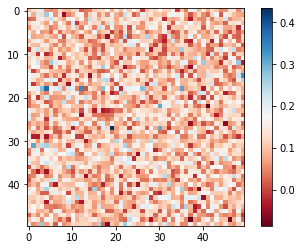

In [12]:
# plt.imshow(M[:50, :50], cmap='RdBu', interpolation='nearest')
plt.imshow(M[:50, :50], cmap='RdBu', interpolation='nearest')
plt.colorbar()

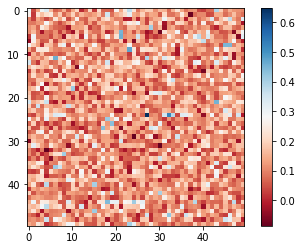

In [13]:
plt.imshow(M[row_permute_sort_index, :][:50, :50], cmap='RdBu', interpolation='nearest')
plt.colorbar()


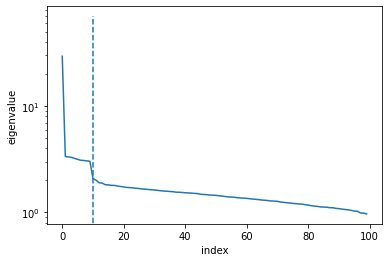

In [14]:
_, s, _ = np.linalg.svd(M, full_matrices=True)
plt.semilogy(range(s.shape[0]), s)
plt.xlabel('index')
plt.ylabel('eigenvalue')
plt.vlines(x=Intermedia_rank, ymax=70, ymin=0, linestyles='--')

In [15]:
np.save('./synthetic_real_data_v4/M_B{}_noise{}_p{}.npy'.format(Block_size, N_noise, p), M)
np.save('./synthetic_real_data_v4/L_B{}_noise{}_p{}.npy'.format(Block_size, N_noise, p), L)
np.save('./synthetic_real_data_v4/N_B{}_noise{}_p{}.npy'.format(Block_size, N_noise, p), N)
np.save('./synthetic_real_data_v4/S_B{}_noise{}_p{}.npy'.format(Block_size, N_noise, p), S)
np.save('./synthetic_real_data_v4/row_permute_sort_index_B{}_noise{}_p{}.npy'.format(Block_size, N_noise, p), row_permute_sort_index)


In [16]:
B = M.copy()
not_nan_idx = np.where(~np.isnan(B.flatten()))[0]
dropped_idx = np.random.choice(not_nan_idx, int(not_nan_idx.shape[0] * 0.3), replace=False)
dropped_idx_val = dropped_idx[:int(not_nan_idx.shape[0] * 0.15)]
dropped_idx_test = dropped_idx[-int(not_nan_idx.shape[0] * 0.15):]
block_index = np.where(S_high.ravel() > 0)

np.save('./synthetic_real_data_v4/not_nan_idx_B{}_noise{}_p{}.npy'.format(Block_size, N_noise, p), not_nan_idx)
np.save('./synthetic_real_data_v4/dropped_idx_B{}_noise{}_p{}.npy'.format(Block_size, N_noise, p), dropped_idx)
np.save('./synthetic_real_data_v4/dropped_idx_val_B{}_noise{}_p{}.npy'.format(Block_size, N_noise, p), dropped_idx_val)
np.save('./synthetic_real_data_v4/dropped_idx_test_B{}_noise{}_p{}.npy'.format(Block_size, N_noise, p), dropped_idx_test)
np.save('./synthetic_real_data_v4/block_idx_test_B{}_noise{}_p{}.npy'.format(Block_size, N_noise, p), block_index)
